In [1]:
import gym
import numpy as np
import torch as th
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.callbacks import BaseCallback
import time
import src

class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        if self.num_timesteps % 50 == 0:
            print('n_calls, timesteps: ', self.n_calls, self.num_timesteps)

def make_env(image, rank, seed_val=0):
    def _init():
        env = src.XtalEnv(image=image)
        env.seed(seed_val+rank)
        return env
    set_random_seed(seed_val)
    return _init

def train(algorithm='DQN', vector_env_type='SubprocVecEnv', num_cpus=[1, 2, 4, 8, 12]):
    
    image = np.load('images/xtal_upper_left.npy')
    env = src.XtalEnv(image=image)
    elapsed_times = []

    for num_cpu in num_cpus:
        if vector_env_type == 'SubprocVecEnv':
            env = SubprocVecEnv([make_env(image=image, rank=i) for i in range(num_cpu)])
        else:
            env = DummyVecEnv([make_env(image=image, rank=i) for i in range(num_cpu)])
        
        if algorithm == 'DQN':
            model = DQN('MlpPolicy', env, verbose=0)
        elif algorithm == 'PPO':
            model = PPO('MlpPolicy', env, verbose=0)
            
        custom_callback = CustomCallback()
        start = time.time()
        print('Starting training: ', algorithm, ', ', vector_env_type, ', ', num_cpu)
        model.learn(total_timesteps = 1000, callback=custom_callback)
        end = time.time()
        time_taken = end - start
        print('num cpu, time: ', num_cpu, time_taken)
        print('Training done\n')
        elapsed_times.append(time_taken)

    return [num_cpus, elapsed_times]

data = {}

data['DQN_subproc'] = train(algorithm='DQN', vector_env_type='SubprocVecEnv', num_cpus=[1, 2, 4, 8, 12])
data['DQN_dummy'] = train(algorithm='DQN', vector_env_type='DummyVecEnv', num_cpus=[1, 2, 4, 8, 12])
data['PPO_subproc'] = train(algorithm='PPO', vector_env_type='SubprocVecEnv', num_cpus=[1, 2, 4, 8, 12])
data['PPO_dummy'] = train(algorithm='PPO', vector_env_type='DummyVecEnv', num_cpus=[1, 2, 4, 8, 12])

Starting training:  DQN ,  SubprocVecEnv ,  1
n_calls, timesteps:  50 50
n_calls, timesteps:  100 100
n_calls, timesteps:  150 150
n_calls, timesteps:  200 200
n_calls, timesteps:  250 250
n_calls, timesteps:  300 300
n_calls, timesteps:  350 350
n_calls, timesteps:  400 400
n_calls, timesteps:  450 450
n_calls, timesteps:  500 500
n_calls, timesteps:  550 550
n_calls, timesteps:  600 600
n_calls, timesteps:  650 650
n_calls, timesteps:  700 700
n_calls, timesteps:  750 750
n_calls, timesteps:  800 800
n_calls, timesteps:  850 850
n_calls, timesteps:  900 900
n_calls, timesteps:  950 950
n_calls, timesteps:  1000 1000
num cpu, time:  1 21.022560596466064
Training done

Starting training:  DQN ,  SubprocVecEnv ,  2
n_calls, timesteps:  25 50
n_calls, timesteps:  50 100
n_calls, timesteps:  75 150
n_calls, timesteps:  100 200
n_calls, timesteps:  125 250
n_calls, timesteps:  150 300
n_calls, timesteps:  175 350
n_calls, timesteps:  200 400
n_calls, timesteps:  225 450
n_calls, timesteps:

n_calls, timesteps:  25 100
n_calls, timesteps:  50 200
n_calls, timesteps:  75 300
n_calls, timesteps:  100 400
n_calls, timesteps:  125 500
n_calls, timesteps:  150 600
n_calls, timesteps:  175 700
n_calls, timesteps:  200 800
n_calls, timesteps:  225 900
n_calls, timesteps:  250 1000
n_calls, timesteps:  275 1100
n_calls, timesteps:  300 1200
n_calls, timesteps:  325 1300
n_calls, timesteps:  350 1400
n_calls, timesteps:  375 1500
n_calls, timesteps:  400 1600
n_calls, timesteps:  425 1700
n_calls, timesteps:  450 1800
n_calls, timesteps:  475 1900
n_calls, timesteps:  500 2000
n_calls, timesteps:  525 2100
n_calls, timesteps:  550 2200
n_calls, timesteps:  575 2300
n_calls, timesteps:  600 2400
n_calls, timesteps:  625 2500
n_calls, timesteps:  650 2600
n_calls, timesteps:  675 2700
n_calls, timesteps:  700 2800
n_calls, timesteps:  725 2900
n_calls, timesteps:  750 3000
n_calls, timesteps:  775 3100
n_calls, timesteps:  800 3200
n_calls, timesteps:  825 3300
n_calls, timesteps:  8

n_calls, timesteps:  800 800
n_calls, timesteps:  850 850
n_calls, timesteps:  900 900
n_calls, timesteps:  950 950
n_calls, timesteps:  1000 1000
n_calls, timesteps:  1050 1050
n_calls, timesteps:  1100 1100
n_calls, timesteps:  1150 1150
n_calls, timesteps:  1200 1200
n_calls, timesteps:  1250 1250
n_calls, timesteps:  1300 1300
n_calls, timesteps:  1350 1350
n_calls, timesteps:  1400 1400
n_calls, timesteps:  1450 1450
n_calls, timesteps:  1500 1500
n_calls, timesteps:  1550 1550
n_calls, timesteps:  1600 1600
n_calls, timesteps:  1650 1650
n_calls, timesteps:  1700 1700
n_calls, timesteps:  1750 1750
n_calls, timesteps:  1800 1800
n_calls, timesteps:  1850 1850
n_calls, timesteps:  1900 1900
n_calls, timesteps:  1950 1950
n_calls, timesteps:  2000 2000
num cpu, time:  1 46.867870569229126
Training done

Starting training:  PPO ,  DummyVecEnv ,  2
n_calls, timesteps:  25 50
n_calls, timesteps:  50 100
n_calls, timesteps:  75 150
n_calls, timesteps:  100 200
n_calls, timesteps:  125 

n_calls, timesteps:  1850 14800
n_calls, timesteps:  1875 15000
n_calls, timesteps:  1900 15200
n_calls, timesteps:  1925 15400
n_calls, timesteps:  1950 15600
n_calls, timesteps:  1975 15800
n_calls, timesteps:  2000 16000
n_calls, timesteps:  2025 16200
num cpu, time:  8 359.21533012390137
Training done

Starting training:  PPO ,  DummyVecEnv ,  12
n_calls, timesteps:  25 300
n_calls, timesteps:  50 600
n_calls, timesteps:  75 900
n_calls, timesteps:  100 1200
n_calls, timesteps:  125 1500
n_calls, timesteps:  150 1800
n_calls, timesteps:  175 2100
n_calls, timesteps:  200 2400
n_calls, timesteps:  225 2700
n_calls, timesteps:  250 3000
n_calls, timesteps:  275 3300
n_calls, timesteps:  300 3600
n_calls, timesteps:  325 3900
n_calls, timesteps:  350 4200
n_calls, timesteps:  375 4500
n_calls, timesteps:  400 4800
n_calls, timesteps:  425 5100
n_calls, timesteps:  450 5400
n_calls, timesteps:  475 5700
n_calls, timesteps:  500 6000
n_calls, timesteps:  525 6300
n_calls, timesteps:  55

Process ForkServerProcess-50:
Process ForkServerProcess-49:
Process ForkServerProcess-52:
Process ForkServerProcess-54:
Process ForkServerProcess-51:
Process ForkServerProcess-53:
Process ForkServerProcess-43:
Process ForkServerProcess-47:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/stephan/anaconda3/envs/xtals/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/stephan/anaconda3/envs/xtals/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/stephan/anaconda3/envs/xtals/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stephan/anaconda3/envs/xtals/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stephan/anaconda3/envs/xtals/lib/python3.9/site-packages/s

KeyboardInterrupt: 

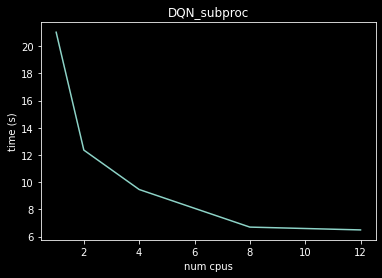

In [7]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.plot(data['DQN_subproc'][0], data['DQN_subproc'][1])
plt.title('DQN_subproc')
plt.xlabel('num cpus')
plt.ylabel('time (s)')
plt.show()

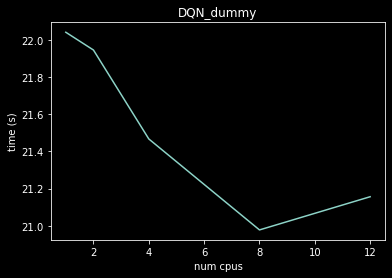

In [9]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.plot(data['DQN_dummy'][0], data['DQN_dummy'][1])
plt.title('DQN_dummy')
plt.xlabel('num cpus')
plt.ylabel('time (s)')
plt.show()

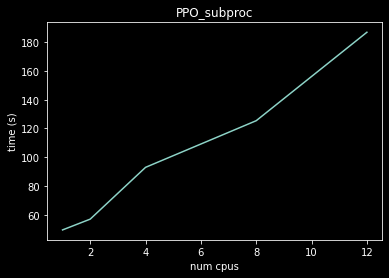

In [10]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.plot(data['PPO_subproc'][0], data['PPO_subproc'][1])
plt.title('PPO_subproc')
plt.xlabel('num cpus')
plt.ylabel('time (s)')
plt.show()